In [30]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Sequential is  a linear stack of layers that allows to create models layer-by-layer in a step-by-step fashion
Dense layer which is the case for fully connected neural networks. Or in the case of perceptron, the output node is connected to all the input nudes.
As such, Dense will be used to construct densely-connected NN layers.

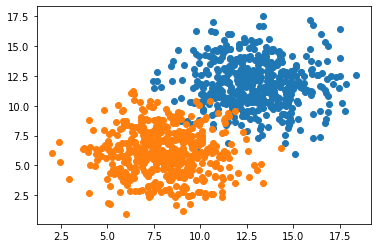

In [33]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
# label / target
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [47]:
model = Sequential()

model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

adam = Adam(lr = 0.1)

#metrics is very similar to loss function but it only judges the performance at every epoch
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# verbose is used to distinguise which point's belongs to what's class
# verbose = 1 display the progress bar of model performance at each epoch, Verbose = 0 does not show anything 
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true')


Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 3.1557 - accuracy: 0.5010
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.6130
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8000
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8450
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8810
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.9140
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.9360
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.9390
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.9520
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.9560
Epoch 11/

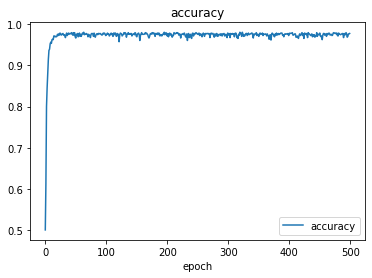

In [48]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

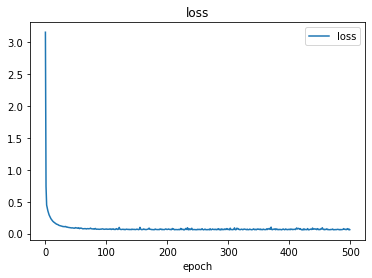

In [49]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [101]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) -1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) -1, max(X[:, 1]) + 1)
    
    print(x_span.shape)
    print(y_span.shape)
    
    print("-Meshgrid--")
    
    xx, yy = np.meshgrid(x_span, y_span)
    print(xx)
    print(yy)
    
    print("----Convert in a single array---")
    xx_, yy_ = xx.ravel(), yy.ravel()
    print(xx_)
    print(yy_)
    
    print("---grid---")
    grid = np.c_[xx_, yy_] # np.c_ means concatination
    print(grid)
    
    print("---prediction---")
    pred_func = model.predict(grid)
    print(pred_func)
    print("----")
    z = pred_func.reshape(xx.shape)
    print(z)
    plt.contourf(xx, yy, z)    

[ 1.01077428  1.38591048  1.76104668  2.13618288  2.51131908  2.88645528
  3.26159148  3.63672768  4.01186388  4.38700008  4.76213628  5.13727249
  5.51240869  5.88754489  6.26268109  6.63781729  7.01295349  7.38808969
  7.76322589  8.13836209  8.51349829  8.88863449  9.26377069  9.63890689
 10.01404309 10.38917929 10.76431549 11.13945169 11.51458789 11.88972409
 12.2648603  12.6399965  13.0151327  13.3902689  13.7654051  14.1405413
 14.5156775  14.8908137  15.2659499  15.6410861  16.0162223  16.3913585
 16.7664947  17.1416309  17.5167671  17.8919033  18.2670395  18.6421757
 19.0173119  19.39244811]
(50,)
-Meshgrid--
[[ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 ...
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.64217

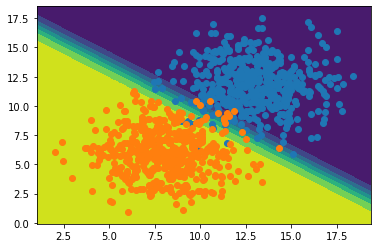

In [100]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

(100,)
(100,)
-Meshgrid--
[[ 1.01077428  1.19644775  1.38212123 ... 19.02110116 19.20677463
  19.39244811]
 [ 1.01077428  1.19644775  1.38212123 ... 19.02110116 19.20677463
  19.39244811]
 [ 1.01077428  1.19644775  1.38212123 ... 19.02110116 19.20677463
  19.39244811]
 ...
 [ 1.01077428  1.19644775  1.38212123 ... 19.02110116 19.20677463
  19.39244811]
 [ 1.01077428  1.19644775  1.38212123 ... 19.02110116 19.20677463
  19.39244811]
 [ 1.01077428  1.19644775  1.38212123 ... 19.02110116 19.20677463
  19.39244811]]
[[-0.08247762 -0.08247762 -0.08247762 ... -0.08247762 -0.08247762
  -0.08247762]
 [ 0.10541317  0.10541317  0.10541317 ...  0.10541317  0.10541317
   0.10541317]
 [ 0.29330396  0.29330396  0.29330396 ...  0.29330396  0.29330396
   0.29330396]
 ...
 [18.14292866 18.14292866 18.14292866 ... 18.14292866 18.14292866
  18.14292866]
 [18.33081944 18.33081944 18.33081944 ... 18.33081944 18.33081944
  18.33081944]
 [18.51871023 18.51871023 18.51871023 ... 18.51871023 18.51871023
  18.5

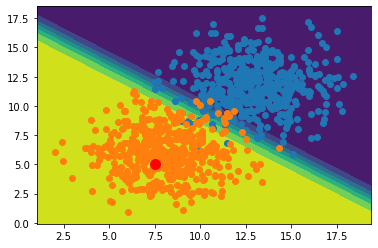

In [96]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

x = 7.5
y = 5

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")